In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

import pywt
import pywt.data
from keras.datasets import mnist
import time

In [2]:
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA, QDA
from sklearn.neighbors import NearestCentroid #NM
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC #SVM


In [3]:
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    NearestCentroid(),
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=3, algorithm='brute'),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=7),
    SVC()  
]

title = [
    'Naiwny Bayes',
    'LDA',
    'Nearest Mean',
    'kNN1',
    'kNN3',
    'kNN5',
    'kNN7',
    'SVM'
]

wavelet_type = 'db3'

In [4]:
(xtrain_mnist, y_train_mnist),(dataset, label) = mnist.load_data()

In [5]:
dataset_reshape = np.reshape(dataset, (dataset.shape[0], -1))
label_reshape = np.array(label, dtype=int)



xTest_mnist = np.reshape(xtrain_mnist, (xtrain_mnist.shape[0], -1))
y_test_mnist = np.array(y_train_mnist, dtype=int)

In [6]:
def fit_model(name, sample, data,label):

    X_train, X_test, y_train, y_test = train_test_split(
        data, label, test_size=sample, shuffle=True
    )
    name.fit(X_train,y_train)
    predicted = name.predict(X_test)

    return predicted, X_test, y_test

Dla oryginalnego obrazka

In [8]:
test_sample = 0.4

for idx, i in enumerate(classifiers):
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  start_time = time.time() 
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, dataset_reshape, label)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  end_time = time.time()  # Koniec mierzenia czasu
  elapsed_time = end_time - start_time
  print('Średnia dokłądności: ',meanAcc)
  print('Czas obliczania: ', elapsed_time, ' sekund')

Model:  GaussianNB()


KeyboardInterrupt: 

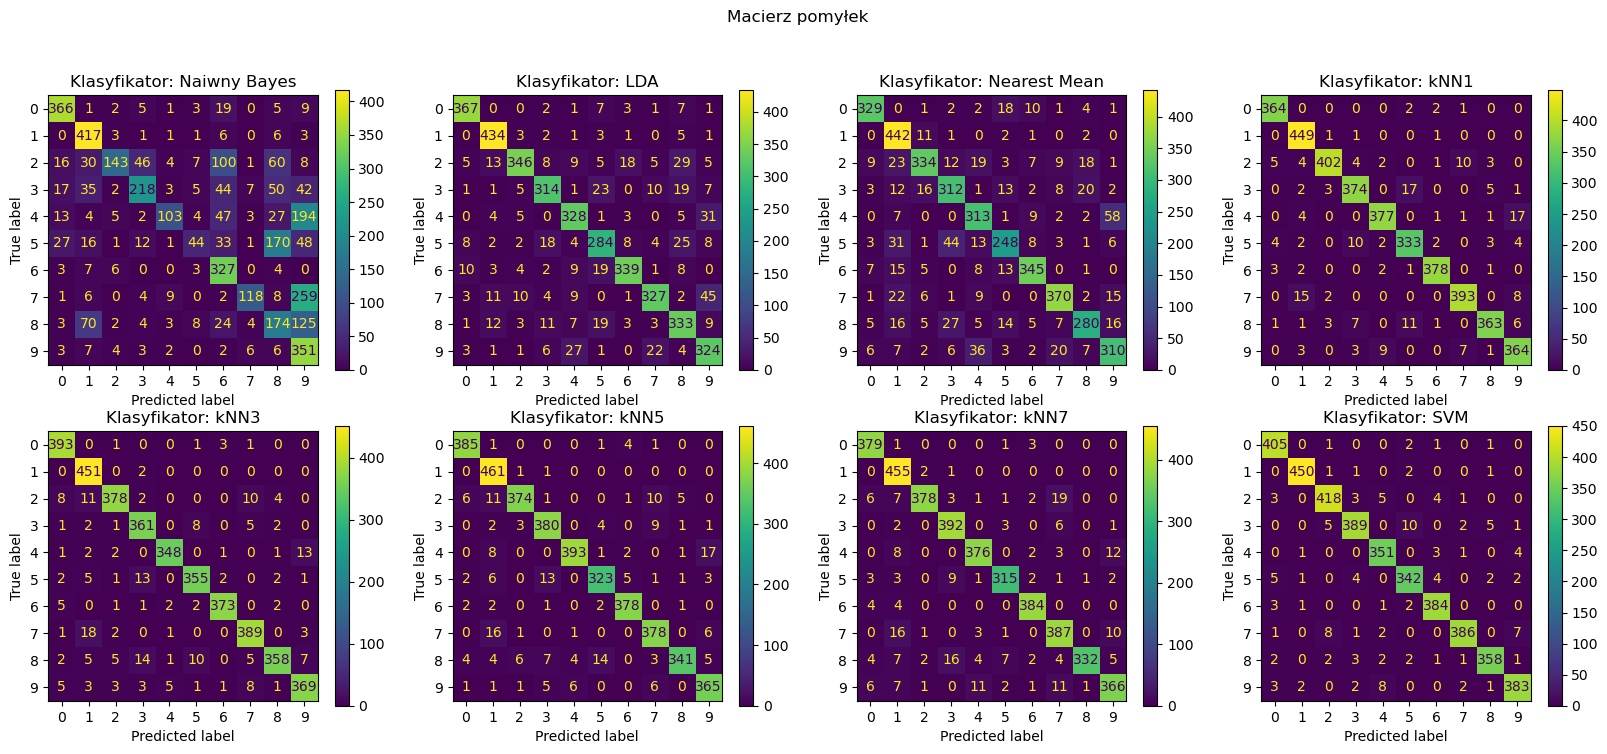

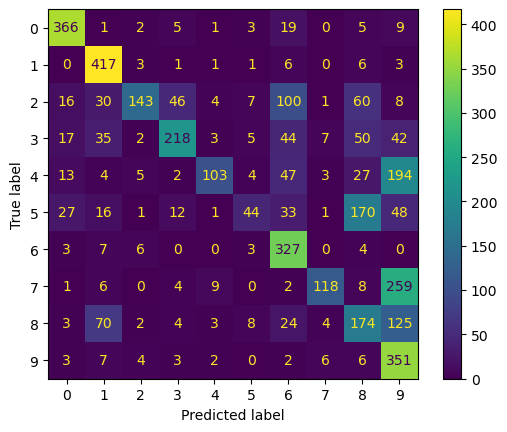

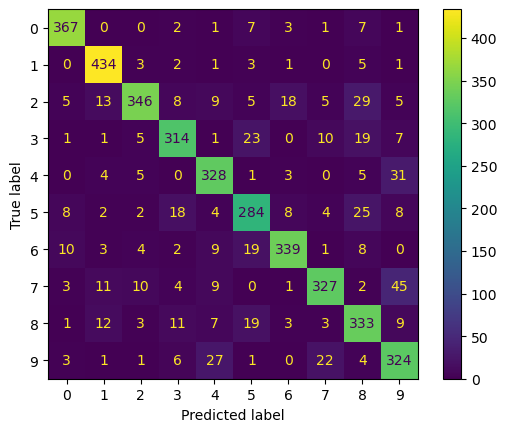

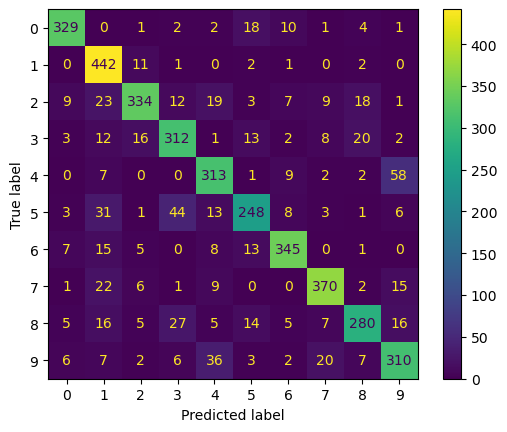

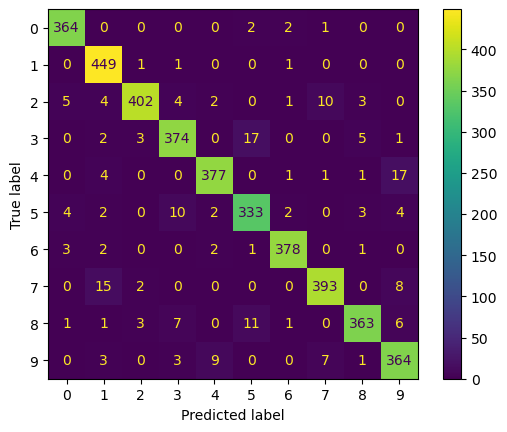

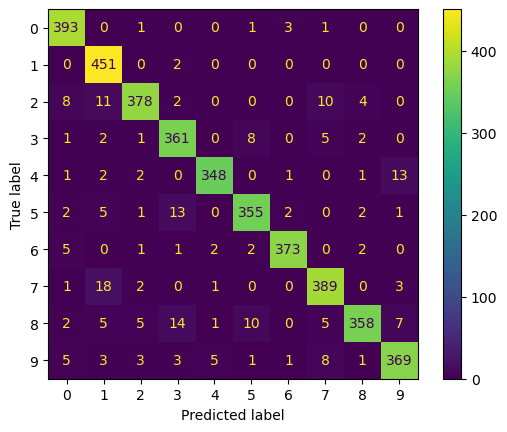

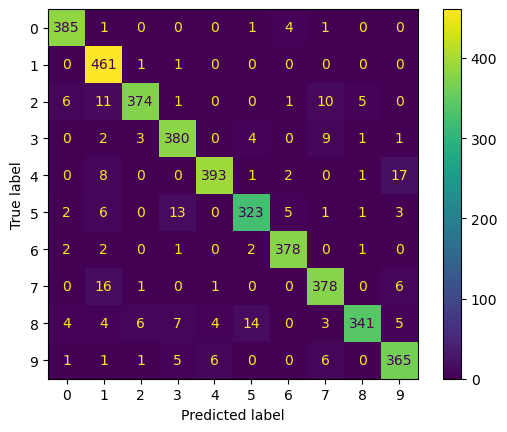

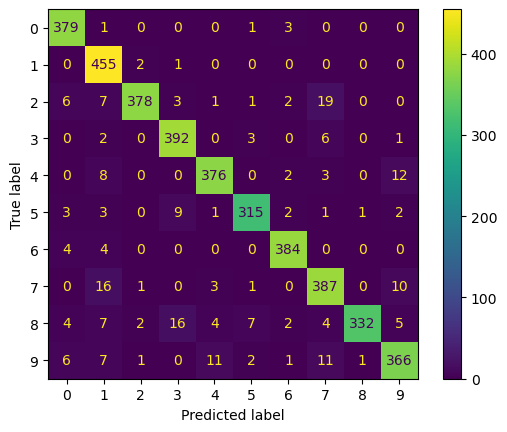

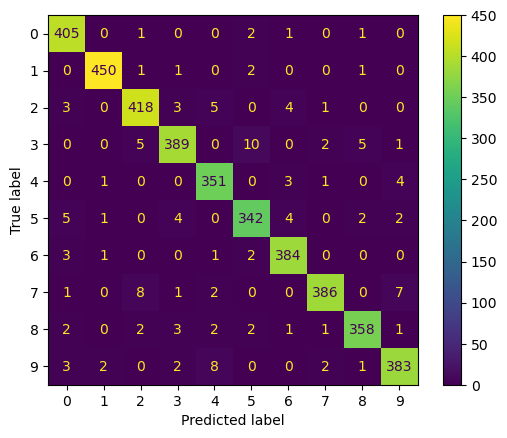

In [50]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for idx, i in enumerate(classifiers):
    predicted, X_test, y_test = fit_model(i,test_sample, dataset_reshape, label_reshape)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.plot(ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_title('Klasyfikator: ' + title[idx])

    # print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig.suptitle("Macierz pomyłek")
# plt.tight_layout()
plt.show()

In [12]:
images_haar_full = np.empty(shape=(10000,1024))
images_haar_LL = np.empty(shape=(10000,16,16))
images_haar_details = np.empty(shape=(10000,768))


for i in range(len(dataset)):
    db_2_mnist_test = pywt.dwt2(dataset[i], wavelet_type)
    LL, (LH, HL, HH) = db_2_mnist_test
    images_haar_full[i] = np.concatenate((LL,LH,HL,HH), axis=None)
    images_haar_LL[i] = LL
    images_haar_details[i] = np.concatenate((LH,HL,HH), axis=None)

In [24]:
test_sample = 0.4

for idx, i in enumerate(classifiers):
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  start_time = time.time() 
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, label)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  end_time = time.time()  # Koniec mierzenia czasu
  elapsed_time = end_time - start_time
  print('Średnia dokłądności: ',meanAcc)
  print('Czas obliczania: ', elapsed_time, ' sekund')
  

Model:  GaussianNB()
Średnia dokłądności:  0.58675
Czas obliczania:  7.107055425643921  sekund
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.852675
Czas obliczania:  24.601584434509277  sekund
Model:  NearestCentroid()
Średnia dokłądności:  0.8066250000000001
Czas obliczania:  0.9586737155914307  sekund
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.943675
Czas obliczania:  9.18258547782898  sekund
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.941325
Czas obliczania:  9.046891450881958  sekund
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9395749999999999
Czas obliczania:  9.443899393081665  sekund
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9359750000000002
Czas obliczania:  9.218299627304077  sekund
Model:  SVC()
Średnia dokłądności:  0.957925
Czas obliczania:  185.25136828422546  sekund


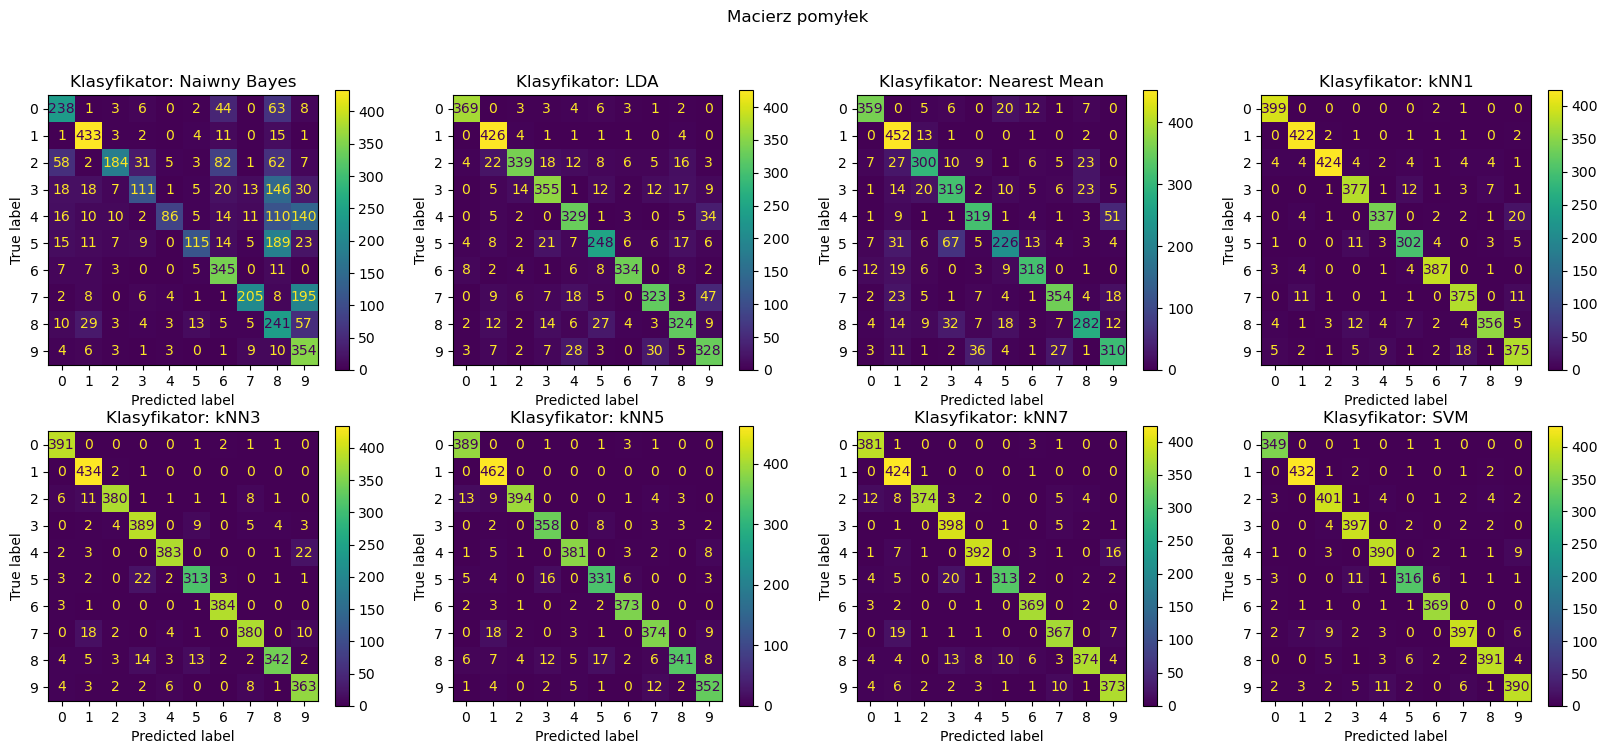

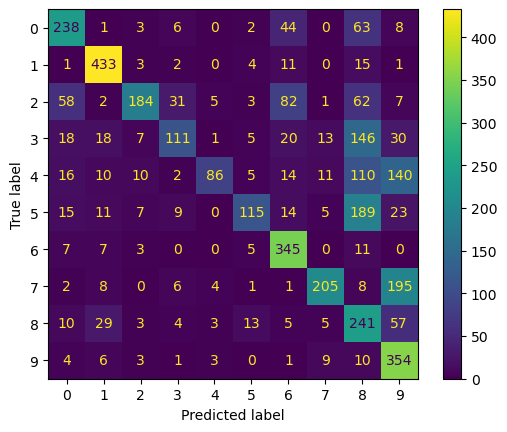

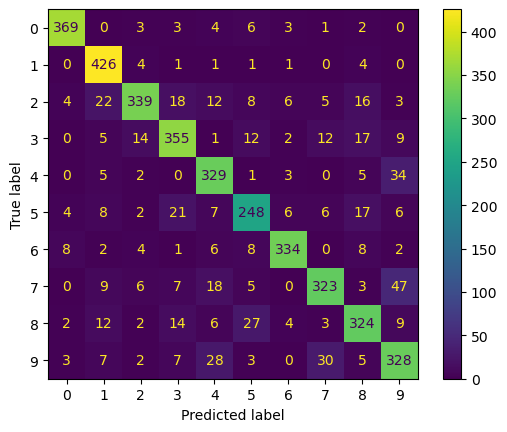

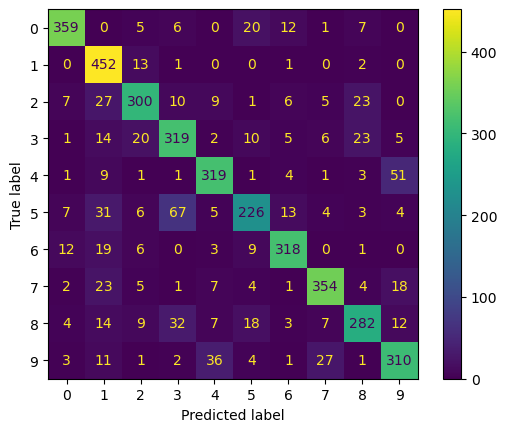

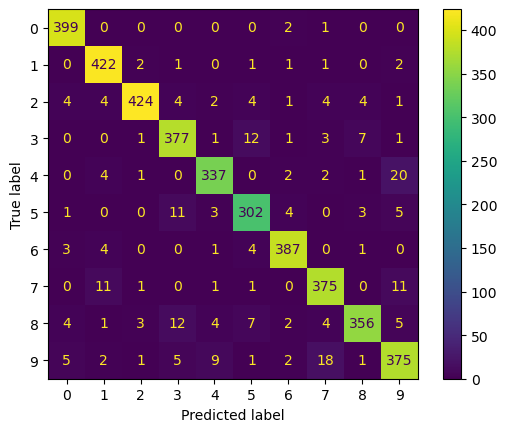

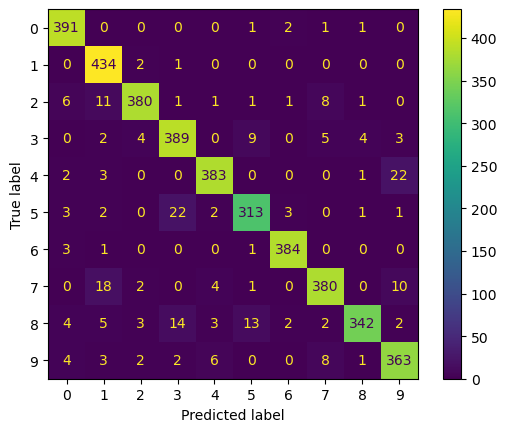

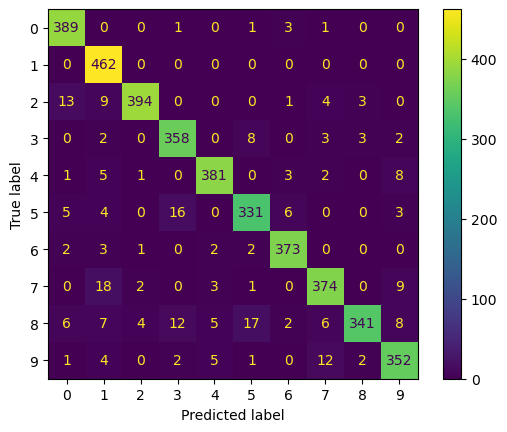

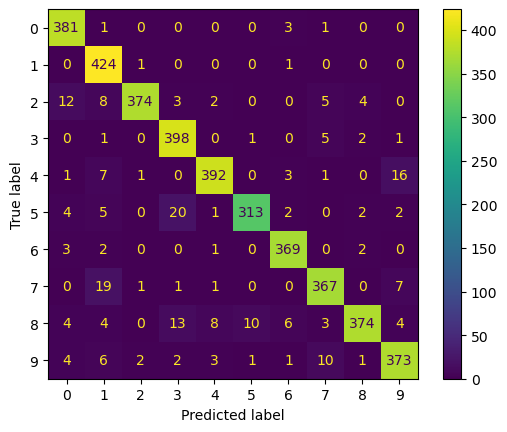

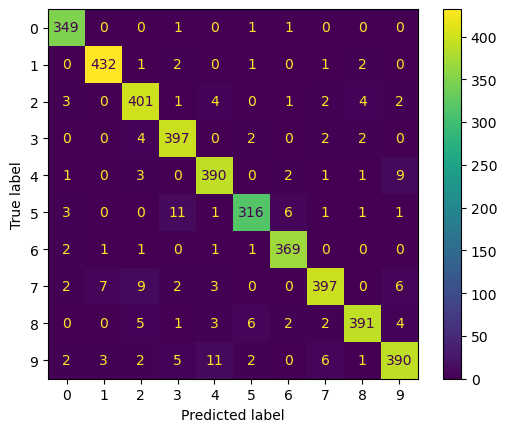

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for idx, i in enumerate(classifiers):
    predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, label)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.plot(ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_title('Klasyfikator: ' + title[idx])

    # print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig.suptitle("Macierz pomyłek")
# plt.tight_layout()
plt.show()


Haar Lvl 2

In [26]:
images_haar_full_2 = np.empty(shape=(10000,400))
images_haar_full = np.empty(shape=(10000,1168))
images_haar_LL_2 = np.empty(shape=(10000,10,10))
images_haar_details_2 = np.empty(shape=(10000,300))

for i in range(len(images_haar_LL)):
    db_2_mnist_test = pywt.dwt2(images_haar_LL[i], wavelet_type)
    LL2, (LH2, HL2, HH2) = db_2_mnist_test
    images_haar_full_2[i] = np.concatenate((LL2,LH2,HL2,HH2), axis=None)
    images_haar_full[i] = np.concatenate((images_haar_full_2[i],images_haar_details[i]), axis=0)
    images_haar_LL_2[i] = LL2
    images_haar_details_2[i] = np.concatenate((LH2,HL2,HH2), axis=None)

In [27]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  start_time = time.time() 
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, label)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  end_time = time.time()  # Koniec mierzenia czasu
  elapsed_time = end_time - start_time
  print('Średnia dokłądności: ',meanAcc)
  print('Czas obliczania: ', elapsed_time, ' sekund')

Model:  GaussianNB()
Średnia dokłądności:  0.5746749999999999
Czas obliczania:  6.8026204109191895  sekund
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8512000000000001
Czas obliczania:  22.52398419380188  sekund
Model:  NearestCentroid()
Średnia dokłądności:  0.8194000000000001
Czas obliczania:  0.9560427665710449  sekund
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9460000000000001
Czas obliczania:  9.083136081695557  sekund
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9406500000000001
Czas obliczania:  9.466566324234009  sekund
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9407500000000001
Czas obliczania:  9.916451454162598  sekund
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.938725
Czas obliczania:  10.078203201293945  sekund
Model:  SVC()
Średnia dokłądności:  0.9572500000000002
Czas obliczania:  178.15347862243652  sekund


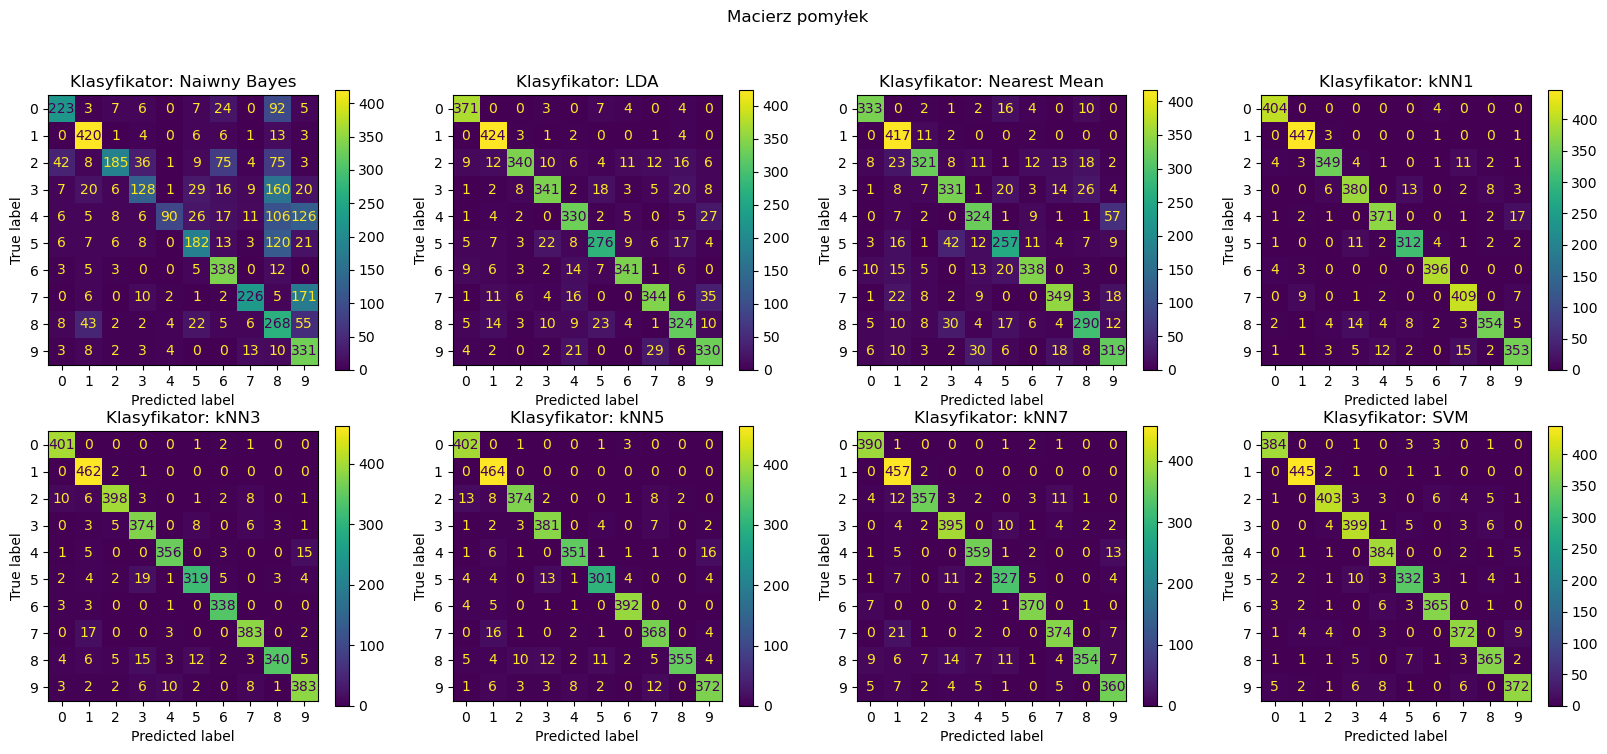

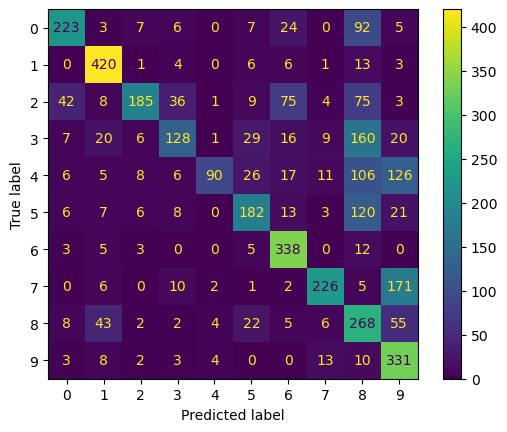

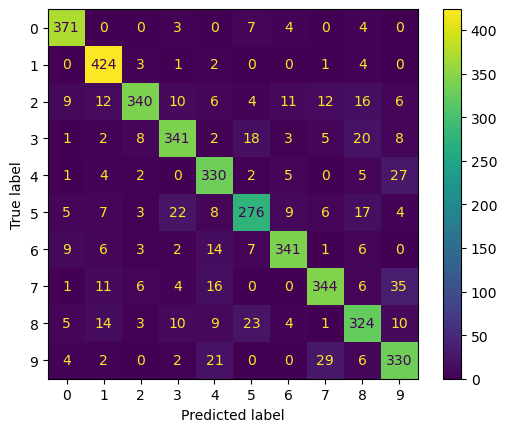

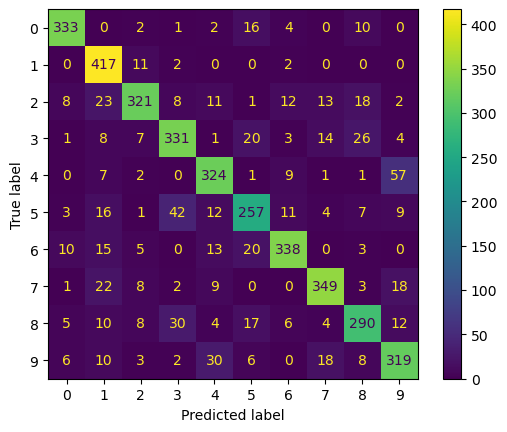

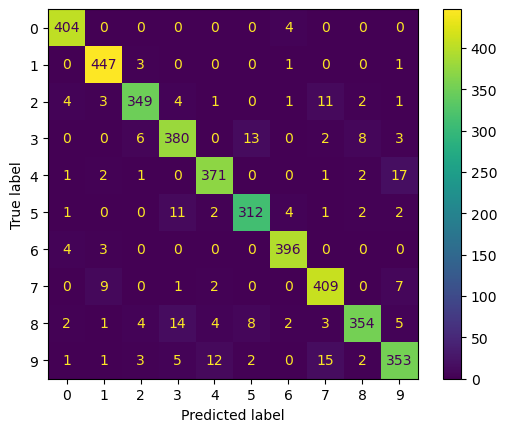

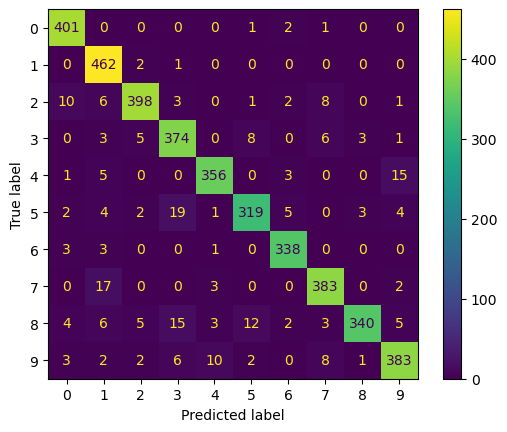

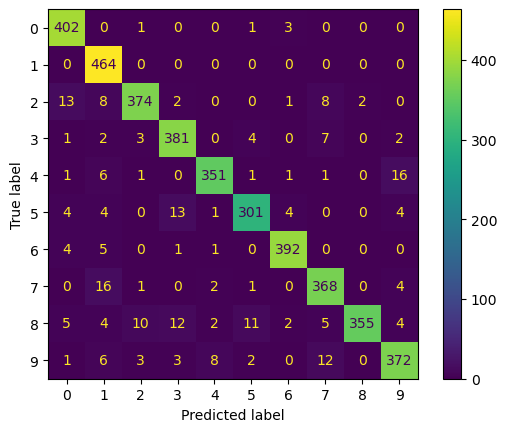

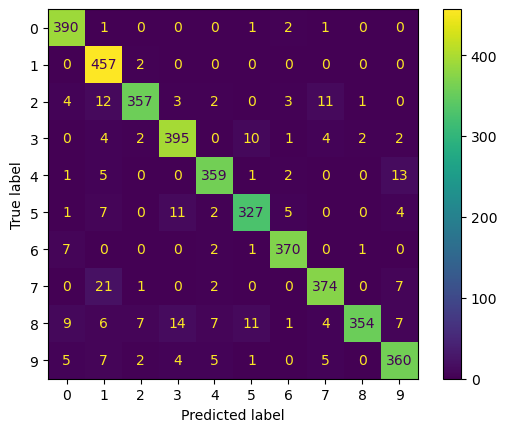

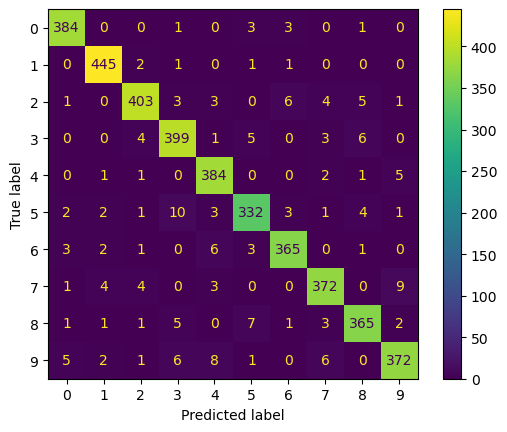

In [28]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for idx, i in enumerate(classifiers):
    predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, label)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.plot(ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_title('Klasyfikator: ' + title[idx])

    # print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig.suptitle("Macierz pomyłek")
# plt.tight_layout()
plt.show()

In [29]:

images_haar_full_3 = np.empty(shape=(10000,196))
images_haar_full_L2 = np.empty(shape=(10000,496))
images_haar_full = np.empty(shape=(10000, 1264))

images_haar_LL_3 = np.empty(shape=(10000,4,4))
images_haar_details_3 = np.empty(shape=(10000,21,7))

for i in range(len(images_haar_LL_2)):
    db_3_mnist_test = pywt.dwt2(images_haar_LL_2[i], wavelet_type)
    LL3, (LH3, HL3, HH3) = db_3_mnist_test
    images_haar_full_3[i] = np.concatenate((LL3,LH3,HL3,HH3), axis=None)
    images_haar_full_L2[i] = np.concatenate((images_haar_full_3[i],images_haar_details_2[i]), axis=0)
    images_haar_full[i] = np.concatenate((images_haar_full_L2[i],images_haar_details[i]), axis=0)
    images_haar_LL_2[i] = LL2
    images_haar_details_3[i] = np.concatenate((LH3,HL3,HH3))

In [30]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  start_time = time.time() 
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, label)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  end_time = time.time()  # Koniec mierzenia czasu
  elapsed_time = end_time - start_time
  print('Średnia dokłądności: ',meanAcc*100)
  print('Czas obliczania: ', elapsed_time, ' sekund')

Model:  GaussianNB()
Średnia dokłądności:  58.42750000000001
Czas obliczania:  7.581398963928223  sekund
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  85.455
Czas obliczania:  25.86753010749817  sekund
Model:  NearestCentroid()
Średnia dokłądności:  80.4725
Czas obliczania:  1.0550639629364014  sekund
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  94.17
Czas obliczania:  10.059422731399536  sekund
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  94.055
Czas obliczania:  10.077829599380493  sekund
Model:  KNeighborsClassifier()
Średnia dokłądności:  93.865
Czas obliczania:  9.755584716796875  sekund
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  93.69500000000001
Czas obliczania:  10.03956413269043  sekund
Model:  SVC()
Średnia dokłądności:  95.50750000000001
Czas obliczania:  193.87022304534912  sekund


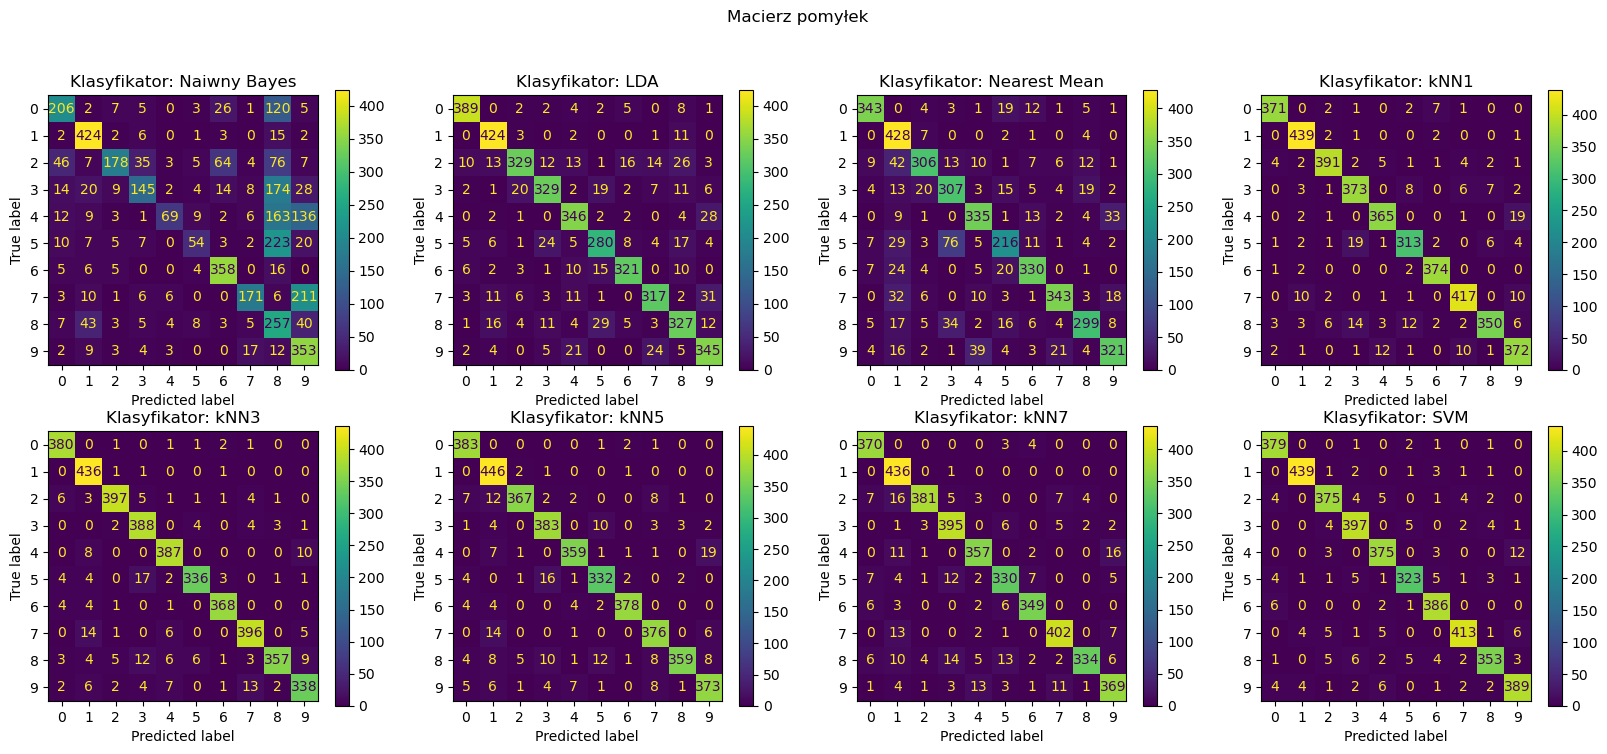

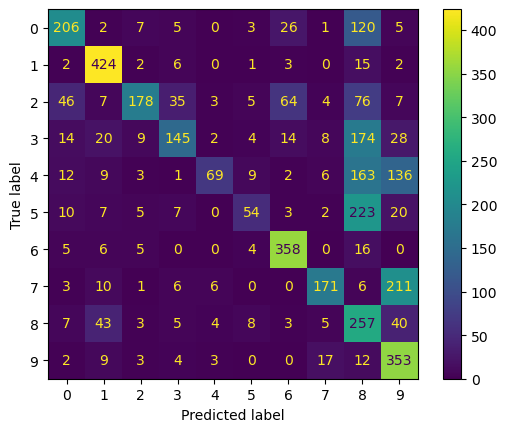

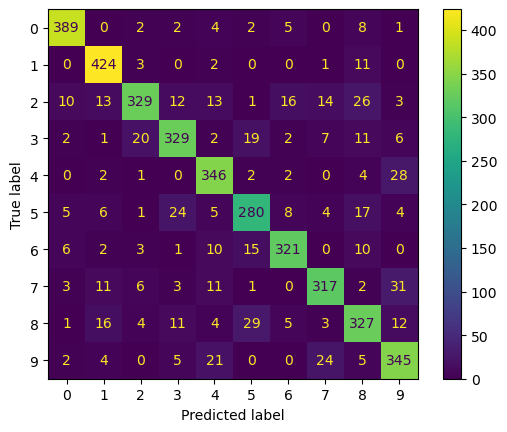

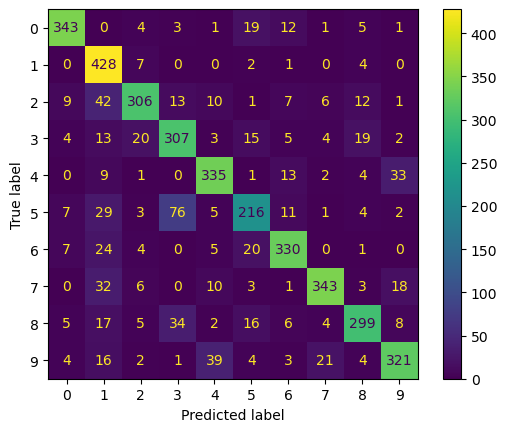

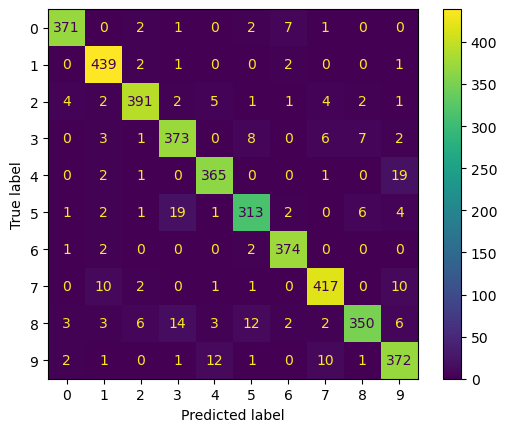

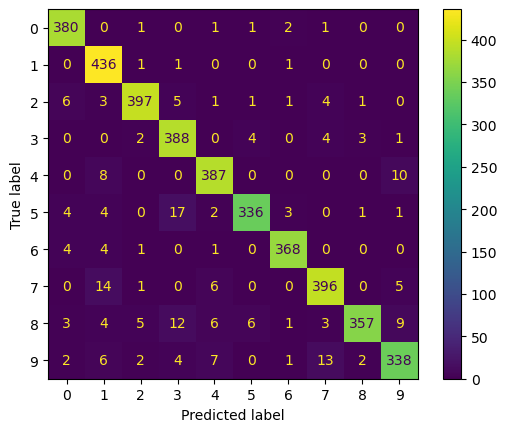

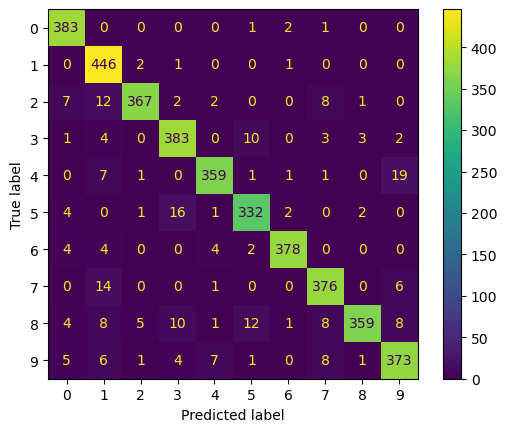

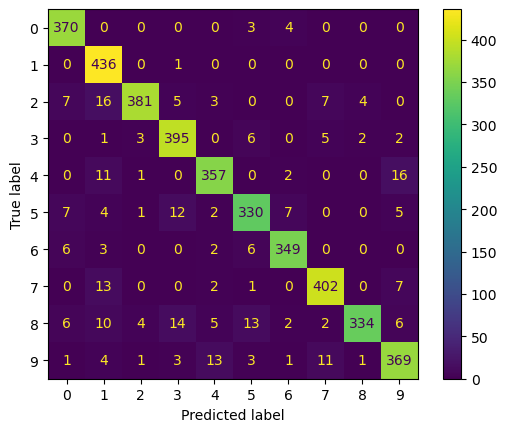

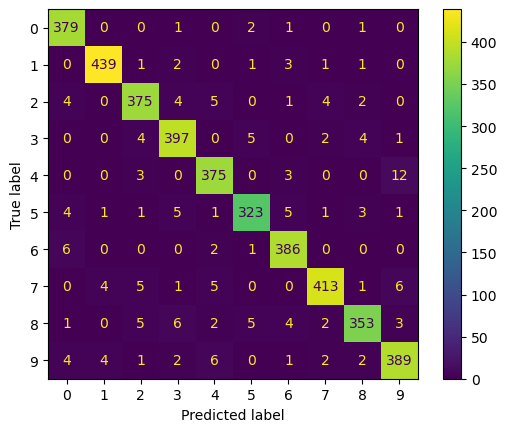

In [31]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for idx, i in enumerate(classifiers):
    predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, label)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.plot(ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_title('Klasyfikator: ' + title[idx])

    # print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig.suptitle("Macierz pomyłek")
# plt.tight_layout()
plt.show()